<a href="https://colab.research.google.com/github/ojaljain18/Fare_Prediction_of_flight/blob/main/flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Data_Train.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
df.dropna(inplace=True)

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [7]:
data=df.copy()

In [8]:
def change_datatype(col):
    data[col]= pd.to_datetime(data[col])

for features in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_datatype(features)

<ipython-input-8-41a53a7ef6b2>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data[col]= pd.to_datetime(data[col])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [9]:
data['Journey_Date']=data['Date_of_Journey'].dt.day
data['Journey_Month']=data['Date_of_Journey'].dt.month
data['Journey_Year']=data['Date_of_Journey'].dt.year
data['Dep_Time_hour']=data['Dep_Time'].dt.hour
data['Dep_Time_minute']=data['Dep_Time'].dt.minute
data['Arrival_Time_hour']=data['Arrival_Time'].dt.hour
data['Arrival_Time_minute']=data['Arrival_Time'].dt.minute

In [10]:
cols_to_drop = ['Arrival_Time','Dep_Time']
data.drop(cols_to_drop, axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  object        
 4   Route                10682 non-null  object        
 5   Duration             10682 non-null  object        
 6   Total_Stops          10682 non-null  object        
 7   Additional_Info      10682 non-null  object        
 8   Price                10682 non-null  int64         
 9   Journey_Date         10682 non-null  int64         
 10  Journey_Month        10682 non-null  int64         
 11  Journey_Year         10682 non-null  int64         
 12  Dep_Time_hour        10682 non-null  int64         
 13  Dep_Time_minute      10682 non-

In [11]:
def flight_dep_time(x):
  if x>4 and x<=8:
    return "Early Morning"
  elif x>8 and x<=12:
    return "Morning"
  elif x>12 and x<=16:
    return "Noon"
  elif x>16 and x<=20:
    return "Evening"
  elif x>20 and x<=24:
    return "Night"
  else:
    return "Late Night"


<Axes: >

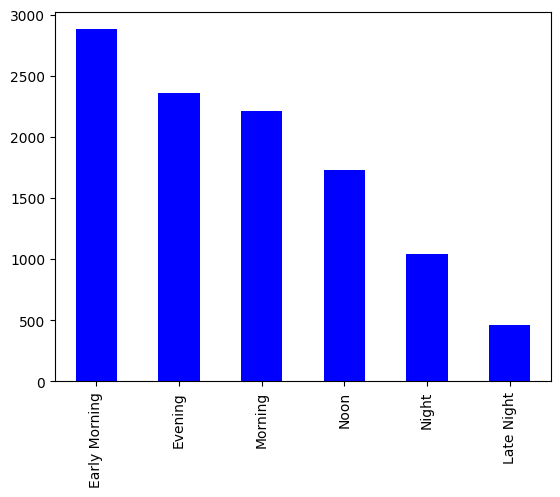

In [12]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar",color='blue')

In [ ]:
data.info()
data['Duration'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  object        
 4   Route                10682 non-null  object        
 5   Duration             10682 non-null  object        
 6   Total_Stops          10682 non-null  object        
 7   Additional_Info      10682 non-null  object        
 8   Price                10682 non-null  int64         
 9   Journey_Date         10682 non-null  int64         
 10  Journey_Month        10682 non-null  int64         
 11  Journey_Year         10682 non-null  int64         
 12  Dep_Time_hour        10682 non-null  int64         
 13  Dep_Time_minute      10682 non-

0

In [13]:
def preprocess_duration(x):
   if 'h' not in x:
     x='0h'+' '+x
   elif 'm' not in x:
     x=x+' '+'0m'

   return x

In [14]:
data['Duration']=data['Duration'].apply(preprocess_duration)
data['Duration'].isnull().sum()


0

In [15]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [16]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))
data['Duration_minutes']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [17]:
data['Duration_total_mins']= data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [ ]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

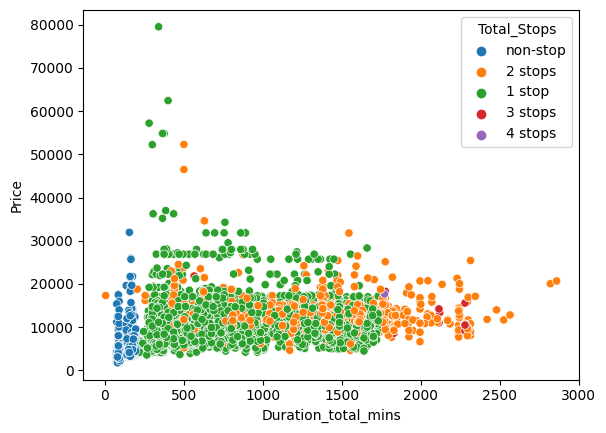

In [18]:
sns.scatterplot(x='Duration_total_mins',y='Price',hue='Total_Stops',data=data)

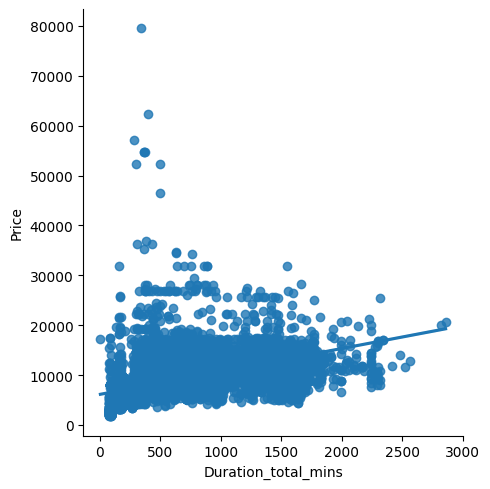

In [ ]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

In [19]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

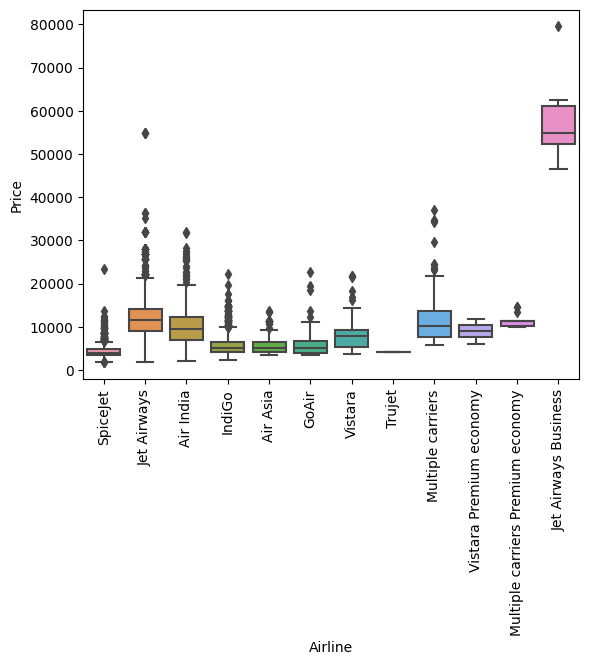

In [ ]:
sns.boxplot(y='Price',x='Airline', data=data.sort_values('Price'))
plt.xticks(rotation='vertical')
plt.show()

In [20]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [ ]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [21]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [ ]:
num_col

['Date_of_Journey',
 'Price',
 'Journey_Date',
 'Journey_Month',
 'Journey_Year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes',
 'Duration_total_mins']

In [ ]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [22]:
data = pd.get_dummies(data, columns = ['Source'])


In [ ]:
data

,Airline,Date_of_Journey,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,2019-03-24,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,0,0,1,0
2,Jet Airways,2019-09-06,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-12-05,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,...,23,30,5,25,325,0,0,0,1,0
4,IndiGo,2019-01-03,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,...,21,35,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,...,22,25,2,30,150,0,0,0,1,0
10679,Air India,2019-04-27,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,...,23,20,2,35,155,0,0,0,1,0
10680,Jet Airways,2019-04-27,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,...,11,20,3,0,180,1,0,0,0,0
10681,Vistara,2019-01-03,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,...,14,10,2,40,160,1,0,0,0,0


In [24]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [25]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [26]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [27]:
dict_airlines = {key:index for index,key in enumerate(airlines ,0)}

In [28]:
data['Airline']=data['Airline'].map(dict_airlines)

In [29]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [30]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index
dict_dest = {key:index for index,key in enumerate(dest ,0)}

In [31]:
data['Destination']=data['Destination'].map(dict_dest)

In [ ]:
data

,Airline,Date_of_Journey,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2019-03-24,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,13,15,7,25,445,0,0,0,1,0
2,10,2019-09-06,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,...,23,30,5,25,325,0,0,0,1,0
4,3,2019-01-03,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,...,21,35,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,2019-09-04,3,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,...,22,25,2,30,150,0,0,0,1,0
10679,7,2019-04-27,3,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,...,23,20,2,35,155,0,0,0,1,0
10680,10,2019-04-27,2,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,...,11,20,3,0,180,1,0,0,0,0
10681,5,2019-01-03,2,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,...,14,10,2,40,160,1,0,0,0,0


In [32]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [ ]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [33]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Destination', 'Route', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_Date',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Duration_total_mins', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [34]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Journey_Year','Route'],axis=1,inplace=True)

In [35]:
data.drop(columns=['Duration'],axis=1,inplace=True)

In [46]:
def plot(df,col):
  fig,(ax1,ax2,ax3)=plt.subplots(3,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)
  sns.distplot(df[col],ax=ax3,kde=False)

<ipython-input-36-c16408925308>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)
<ipython-input-36-c16408925308>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax3,kde=False)


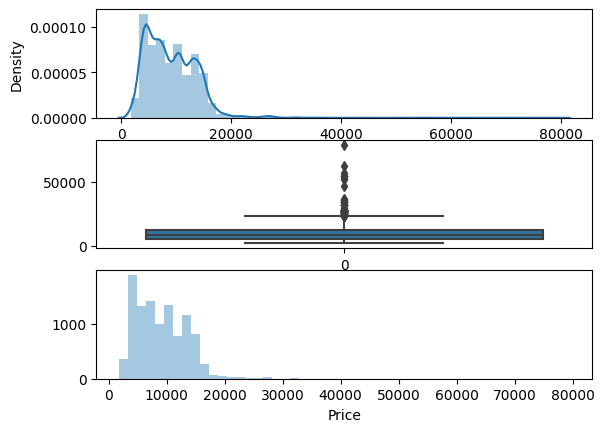

In [37]:
plot(data,'Price')

In [38]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)

iqr = q3-q1
maximum = q3 +1.5*iqr
minimum = q1 -1.5*iqr


In [39]:
print(maximum)
print(minimum)

23017.0
-5367.0


In [48]:
len([i for i in data['Price'] if i> maximum or i< minimum])

TypeError: ignored

In [65]:
data['Price']=df['Price']

In [66]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

In [44]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_Date',
       'Journey_Month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [52]:
data['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: object

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


In [53]:
X= data.drop(['Price'],axis=1)

In [67]:
y=data['Price']

In [55]:
from sklearn.feature_selection import mutual_info_regression

In [68]:
imp=mutual_info_regression(X,y)

In [70]:
imp

array([0.96925268, 0.99756476, 0.78571661, 0.20355331, 0.23909489,
       0.34301073, 0.25641757, 0.40394429, 0.35875071, 0.47347563,
       0.33724363, 0.37500857, 0.12655874, 0.51717932, 0.45228893,
       0.19574763])

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [72]:
X_trainx,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [74]:
model=RandomForestRegressor()

In [76]:
model.fit(X_trainx,y_train)

RandomForestRegressor()

In [77]:
y_pred=model.predict(X_test)

In [79]:
y_pred

array([16714.28      ,  6257.68      ,  8936.21      , ...,
        8862.24      ,  8930.15      , 11837.49183333])

In [80]:
from sklearn import metrics

In [81]:
metrics.r2_score(y_test,y_pred)

0.8100270406830594